In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D
import cv2
import os
import glob

In [2]:
folder=r"C:\Users\pt708\OneDrive\Desktop\start"

In [3]:
from pathlib import Path

In [4]:
catogry=[r'C:\Users\pt708\OneDrive\Desktop\start/Butterfly',r'C:\Users\pt708\OneDrive\Desktop\start\Dragonfly',r'C:\Users\pt708\OneDrive\Desktop\start\Grasshopper',r'C:\Users\pt708\OneDrive\Desktop\start\Ladybird']

In [5]:
butterfly= glob.glob(os.path.join(folder,r'C:\Users\pt708\OneDrive\Desktop\start\Butterfly' ,'*.jpg'))
dragonfly= glob.glob(os.path.join(folder,r'C:\Users\pt708\OneDrive\Desktop\start\Dragonfly','*.jpg'))
Grasshopper= glob.glob(os.path.join(folder,r'C:\Users\pt708\OneDrive\Desktop\start\Grasshopper','*.jpg'))
Ladybird= glob.glob(os.path.join(folder,r'C:\Users\pt708\OneDrive\Desktop\start\Ladybird','*.jpg'))

In [6]:
image=cv2.imread("butterfly", cv2.IMREAD_COLOR)

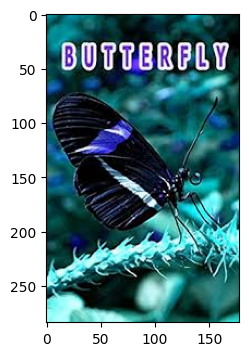

In [7]:
plt.figure(figsize=(4,4))
imgo=cv2.imread(str(butterfly[18]))
plt.imshow(imgo)

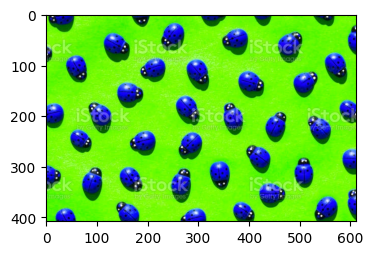

In [8]:
plt.figure(figsize=(4,4))
imgo1=cv2.imread(str(Ladybird[18]))
plt.imshow(imgo1)

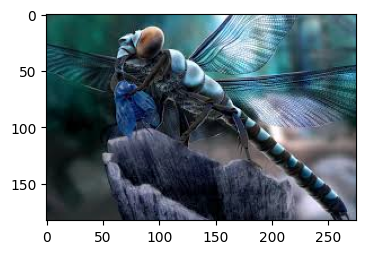

In [9]:
plt.figure(figsize=(4,4))
imgo2=cv2.imread(str(dragonfly[18]))
plt.imshow(imgo2)

In [10]:
imgo.shape

(284, 178, 3)

In [11]:
classification_images={
    'butterfly':glob.glob(os.path.join(folder,r'C:\Users\pt708\OneDrive\Desktop\start\Butterfly' ,'*.jpg')),
    'dragonfly':glob.glob(os.path.join(folder,r'C:\Users\pt708\OneDrive\Desktop\start\Dragonfly','*.jpg')),
    'Grasshopper':glob.glob(os.path.join(folder,r'C:\Users\pt708\OneDrive\Desktop\start\Grasshopper','*.jpg')),
    'Ladybird':glob.glob(os.path.join(folder,r'C:\Users\pt708\OneDrive\Desktop\start\Ladybird','*.jpg')),
}

In [12]:
insects_label={
    'butterfly':0,
    'dragonfly':1,
    'Grasshopper':2,
    'Ladybird':3
}

In [13]:
len(butterfly)

899

In [14]:
x,y=[],[]
for insect_name,images in classification_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resize_img=cv2.resize(img,(40,40))
        x.append(resize_img)
        y.append(insects_label[insect_name])

In [15]:
x=np.array(x)
y=np.array(y)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
x_train=x_train/255

In [18]:
from tensorflow.keras import layers, models


In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(40,40,3)),
    layers.MaxPooling2D(pool_size=(2,2)),  
    layers.Conv2D(filters=94, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),  # Fixed Flatten() spelling
    layers.Dense(64, activation='relu'),
    layers.Dense(84, activation='softmax')
])


C:\Users\pt708\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 38, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 94)          │          54,238 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 94)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6016)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         385,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │           5,460 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 446,578 (1.70 MB)

 Trainable params: 446,578 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8180 - loss: 0.5148
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8393 - loss: 0.4470
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8812 - loss: 0.3592
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.8865 - loss: 0.3098
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9104 - loss: 0.2662
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9269 - loss: 0.2314
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9547 - loss: 0.1787
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9674 - loss: 0.1355
Epoch 9/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9752 - loss: 0.1043
Epoch 10/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9839 - loss: 0.0743
Epoch 11/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9830 - loss: 0.0812
Epoch 12/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy:

In [31]:
prediction=cnn.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [32]:
prediction

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
score=tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(84,), dtype=float32, numpy=
array([0.03171181, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.01166612, 0.01166612, 0.01166612, 0.01166612, 0.01166612,
       0.011666

In [34]:
np.argmax(score)

0

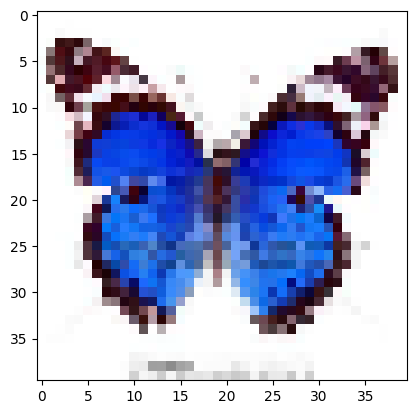

In [35]:
plt.imshow(x[6])

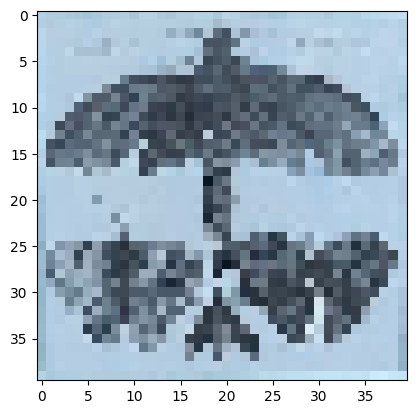

In [40]:
plt.imshow(x[70])